In [1]:
import cobra
import os
from os.path import join
from cobra.flux_analysis import calculate_phenotype_phase_plane
import pandas
pandas.options.display.max_rows = 100

data_dir = "/Users/david/Dropbox (UCSD SBRG)/Xam_Multistrain_Recon/Metabolic_model/BiGG_Model/"
xam_model = cobra.io.read_sbml_model(join(data_dir, "Xam_BiGG.xml"))

import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from time import time

### Original model

In [2]:
print (len(xam_model.reactions))
print (len(xam_model.metabolites))
print (len(xam_model.genes))

1546
1518
878


### FBA

In [3]:
FBA_sol = xam_model.optimize()
print (FBA_sol)

<Solution 1.73 at 0x10465e1d0>


In [4]:
xam_model.solution.status

'optimal'

### Exchange Reactions

In [7]:
for i in [i.id for i in xam_model.reactions if len(i.metabolites) == 1]:
    reaction = xam_model.reactions.get_by_id(i)
    print('%s\t%s\t%s\t%i' % (reaction.id, reaction.reaction, reaction.lower_bound, reaction.upper_bound))

EX_2ddglcn_e	2ddglcn_e --> 	0.0	1000
EX_4hbz_e	4hbz_e <=> 	-10.0	1000
EX_ac_e	ac_e --> 	0.0	1000
EX_acald_e	acald_e --> 	0.0	1000
EX_acgam_e	acgam_e --> 	0.0	1000
EX_adn_e	adn_e --> 	0.0	1000
EX_akg_e	akg_e --> 	0.0	1000
EX_ala__D_e	ala__D_e --> 	0.0	1000
EX_arab__L_e	arab__L_e --> 	0.0	0
EX_arbt_e	arbt_e --> 	0.0	1000
EX_arg__L_e	arg__L_e <=> 	-10.0	1000
EX_ASPt5n_e	asp__L_e --> 	0.0	1000
EX_Biomass_e	BIOMASS_c --> 	0.0	1000
EX_ca2_e	ca2_e <=> 	-10.0	1000
EX_cbl1_e	cbl1_e --> 	0.0	1000
EX_cd2_e	cd2_e --> 	0.0	1000
EX_chol_e	chol_e --> 	0.0	1000
EX_cit_e	cit_e --> 	0.0	1000
EX_cl_e	cl_e <=> 	-10.0	1000
EX_co2_e	co2_e --> 	0.0	1000
EX_cobalt2_e	cobalt2_e <=> 	-10.0	1000
EX_cu2_e	cu2_e <=> 	-10.0	1000
EX_cytd_e	cytd_e --> 	0.0	1000
EX_dad_2_e	dad_2_e --> 	0.0	1000
EX_dcyt_e	dcyt_e --> 	0.0	1000
EX_dgsn_e	dgsn_e --> 	0.0	1000
EX_din_e	din_e --> 	0.0	1000
EX_DNA_e	dna_c <-- 	-10.0	0
EX_duri_e	duri_e --> 	0.0	1000
EX_etha_e	etha_e --> 	0.0	1000
EX_etoh_e	etoh_e --> 	0.0	1000
EX_fe2_e	fe2_e 

### Inactivate Each Exchange Reactions and Perform a FBA

In [11]:
FBA_Ex = {}
for i in [i.id for i in xam_model.reactions if len(i.metabolites) == 1]:
    reaction = xam_model.reactions.get_by_id(i)
    lower = reaction.lower_bound
    reaction.lower_bound = 0
    FBA_sol = xam_model.optimize()
    FBA_Ex[reaction.id] = FBA_sol.f
    print('%s\t%s\t%s\t%i' % (reaction.id, reaction.reaction, reaction.lower_bound, reaction.upper_bound))
    reaction.lower_bound = lower

EX_2ddglcn_e	2ddglcn_e --> 	0	1000
EX_4hbz_e	4hbz_e --> 	0	1000
EX_ac_e	ac_e --> 	0	1000
EX_acald_e	acald_e --> 	0	1000
EX_acgam_e	acgam_e --> 	0	1000
EX_adn_e	adn_e --> 	0	1000
EX_akg_e	akg_e --> 	0	1000
EX_ala__D_e	ala__D_e --> 	0	1000
EX_arab__L_e	arab__L_e --> 	0	0
EX_arbt_e	arbt_e --> 	0	1000
EX_arg__L_e	arg__L_e --> 	0	1000
EX_ASPt5n_e	asp__L_e --> 	0	1000
EX_Biomass_e	BIOMASS_c --> 	0	1000
EX_ca2_e	ca2_e --> 	0	1000
EX_cbl1_e	cbl1_e --> 	0	1000
EX_cd2_e	cd2_e --> 	0	1000
EX_chol_e	chol_e --> 	0	1000
EX_cit_e	cit_e --> 	0	1000
EX_cl_e	cl_e --> 	0	1000
EX_co2_e	co2_e --> 	0	1000
EX_cobalt2_e	cobalt2_e --> 	0	1000
EX_cu2_e	cu2_e --> 	0	1000
EX_cytd_e	cytd_e --> 	0	1000
EX_dad_2_e	dad_2_e --> 	0	1000
EX_dcyt_e	dcyt_e --> 	0	1000
EX_dgsn_e	dgsn_e --> 	0	1000
EX_din_e	din_e --> 	0	1000
EX_DNA_e	dna_c --> 	0	0
EX_duri_e	duri_e --> 	0	1000
EX_etha_e	etha_e --> 	0	1000
EX_etoh_e	etoh_e --> 	0	1000
EX_fe2_e	fe2_e --> 	0	1000
EX_fe3_e	fe3_e --> 	0	1000
EX_for_e	for_e --> 	0	1000
EX_fru_e	f

In [12]:
fbaex_df = pandas.DataFrame.from_dict(FBA_Ex, orient='index').T.round(5)
fbaex_df_t = pandas.DataFrame.transpose(fbaex_df)
fbaex_df_t = fbaex_df_t.rename_axis("Reaction")
fbaex_df_t = fbaex_df_t.rename_axis({0: "Flux"}, axis="columns")
print(fbaex_df_t)

                     Flux
Reaction                 
EX_ins_e          1.73489
EX_uri_e          1.73489
EX_q8_e           1.73489
EX_for_e          1.73489
EX_trp__L_e       0.00000
EX_cobalt2_e      0.00000
EX_so4_e         -0.00000
EX_co2_e          1.73489
EX_mal__L_e       1.73489
EX_k_e            0.00000
EX_cu2_e          0.00000
EX_ptrc_e         1.73489
EX_taur_e         1.73489
EX_cit_e          1.73489
EX_adn_e          1.73489
EX_gam_e          1.73489
EX_glcur_e        1.73489
EX_thymd_e        1.73489
EX_ttdca_e        0.00000
EX_h2o_e          1.73489
EX_ocdca_e        0.00000
EX_glyb_e         1.73489
EX_no2_e          1.73489
EX_fum_e          1.73489
EX_chol_e         1.73489
EX_ca2_e          0.00000
EX_cytd_e         1.73489
EX_etoh_e         1.73489
EX_salcn_e        1.73489
EX_galur_e        1.73489
EX_glu__L_e       1.73489
EX_arab__L_e      1.73489
EX_h_e            1.73489
EX_pyr_e          1.73489
EX_q8h2_e         1.73489
EX_arg__L_e       0.00000
EX_nh4_e    

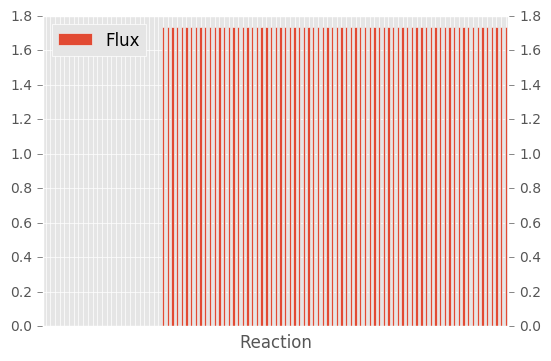

In [13]:
fbaex_df_t_sort = fbaex_df_t.sort_values(by="Flux")
fbaex_df_t_sort.plot.bar()
plt.tick_params(labeltop=False, labelbottom=False, bottom=False, top=False, labelright=True)